**General imports and CIFAR10 data load from Keras**

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
from keras.datasets import cifar10

**CIFAR10 DATA**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
(x_train, y_train), (x_test, y_test) = (x_train[:], y_train[:]), (x_test[:], y_test[:])

In [ ]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

**dictionary that will have class names with their corresponding categorical class labels**

In [ ]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

**checking the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive.**

In [ ]:
np.min(x_train),np.max(x_train)

(0, 255)

In [ ]:
x_train = x_train/255.0

In [ ]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

**createing a dataframe that will hold the pixel values of the images along with their respective labels in a row-column format**

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train_flat = x_train.reshape(-1,3072)

In [ ]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [ ]:
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [ ]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


From the above analysis, size of the dataframe is correct since there are 50,000 training images, each having 3072 pixels and an additional column for labels so in total 3073.

PCA will be applied on all the columns except the last one, which is the label for each image.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

PCA is an unsupervised linear dimensionality reduction and data visualization technique for very high dimensional data. As having high dimensional data is very hard to gain insights from adding to that, it is very computationally intensive. The main idea behind this technique is to reduce the dimensionality of data that is highly correlated by transforming the original set of vectors to a new set which is known as Principal component.
PCA tries to preserve the Global Structure of data i.e when converting d-dimensional data to d’-dimensional data then it tries to map all the clusters as a whole due to which local structures might get lost. Application of this technique includes Noise filtering, feature extractions, stock market predictions, and gene data analysis.

**The PCA method and pass the number of components as two and apply fit_transform on the training data**

In [ ]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

**CIFAR-10 data in a two-dimensional space**

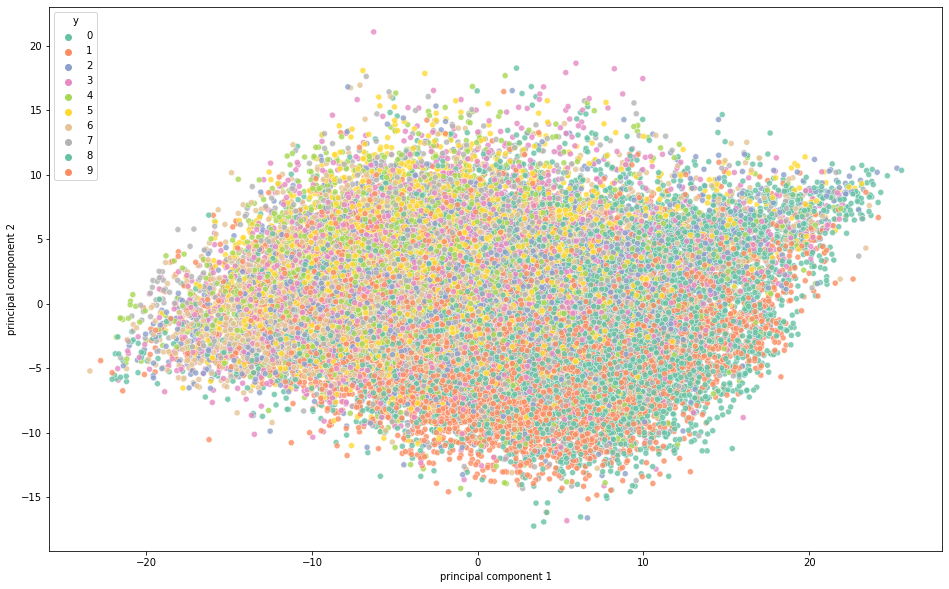

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("Set2", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.8
)

t-SNE is also a unsupervised non-linear dimensionality reduction and data visualization technique. The math behind t-SNE is quite complex but the idea is simple. It embeds the points from a higher dimension to a lower dimension trying to preserve the neighborhood of that point.

Unlike PCA it tries to preserve the Local structure of data by minimizing the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map. This technique finds application in computer security research, music analysis, cancer research, bioinformatics, and biomedical signal processing.

**The TSNE method and pass the number of components as two and apply fit_transform on the training data**

In [ ]:
tsne_cifar = TSNE(n_components=2)
principalComponents_cifar = tsne_cifar.fit_transform(df_cifar.iloc[:,:-1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

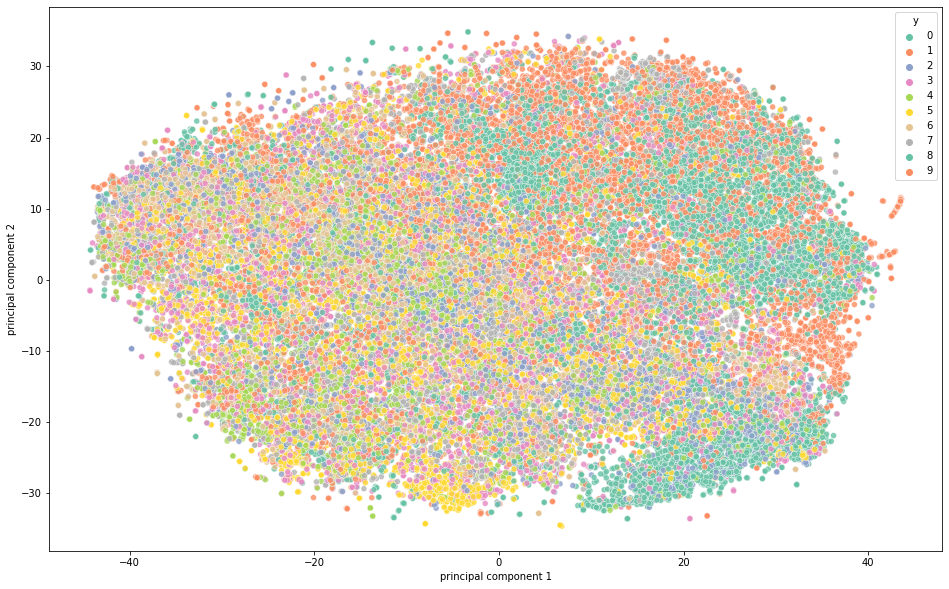

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("Set2", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.8
)

**Key differences between PCA and t-SNE**

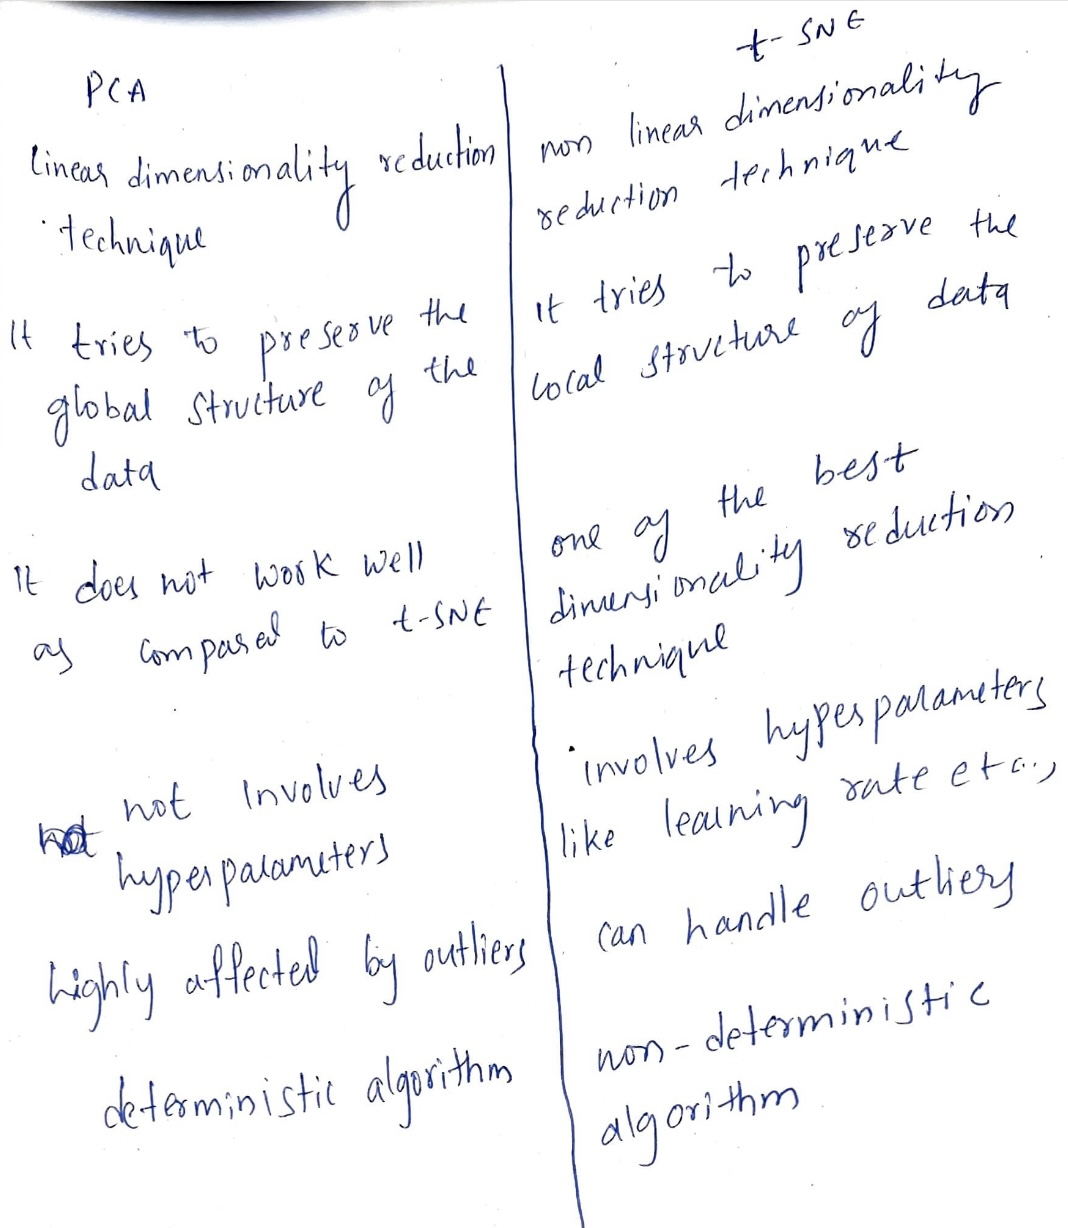